# Clustering Veriyi Benzerliklerine göre kümelendirme 

In [1]:
#pip install --upgrade pandas

In [2]:
import pandas as pd 

In [3]:
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_excel('cars.xls')

In [5]:
df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [6]:
#Hatirlatma - Remember This
#Regression r2 RMSE (yükseklik önemli)
#Classification Accuracy F1 score Classification report and confusion matrix (yükseklik önemli)
#Clustersing Silhouette Score (yükeseklik çok şart değil)

In [7]:
x=df[['Price','Mileage','Cylinder']]

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


In [9]:
x.head()

,Price,Mileage,Cylinder
0,17314.103129,8221,6
1,17542.036083,9135,6
2,16218.847862,13196,6
3,16336.913140,16342,6
4,16339.170324,19832,6


In [10]:
model=KMeans(4) #4 gruba bölmüş oldu aşağıdaki tablodada 4 farkı renk var sebebi bundan dolayı 

In [11]:
mode=model.fit(x)

  File "C:\Users\PC\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\PC\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\PC\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


In [12]:
tahmin=model.predict(x)

In [13]:
x['cluster']=tahmin

In [14]:
x.head()

,Price,Mileage,Cylinder,cluster
0,17314.103129,8221,6,3
1,17542.036083,9135,6,3
2,16218.847862,13196,6,3
3,16336.913140,16342,6,3
4,16339.170324,19832,6,1


In [15]:
silhouette_score(x,tahmin)

0.4127931976809848

In [16]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'fiyat')

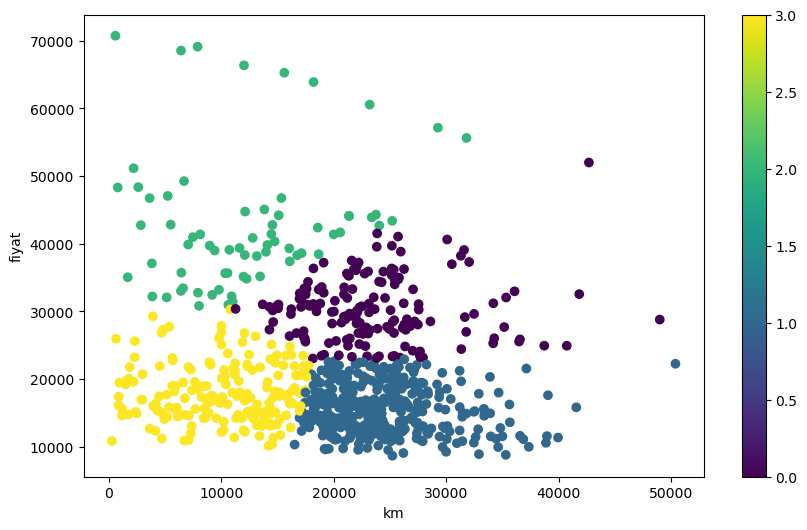

In [17]:
plt.figure(figsize=(10,6))
plt.scatter(x.Mileage, x.Price, c=tahmin)
plt.colorbar();
plt.xlabel("km")
plt.ylabel('fiyat')

In [18]:
# wcss = within cluster sum of squares
wcss=[] #grafikteki birbirine ve kenarara olan uzaklıokları bulmak için kullandık gibi bir şey oldu 
ss=[]

for i in range(2,10):
    model=KMeans(i)
    model=model.fit(x)
    tahmin=model.predict(x)
    ss1=silhouette_score(x,tahmin)
    ss.append(ss1)
    print(ss1)
    wcss.append(model.inertia_)


0.45150701484118655
0.3580190439337745
0.41145279337976737
0.356654696132537
0.36354845786499035
0.3545334305208222
0.3450244716486671
0.34859141680861366


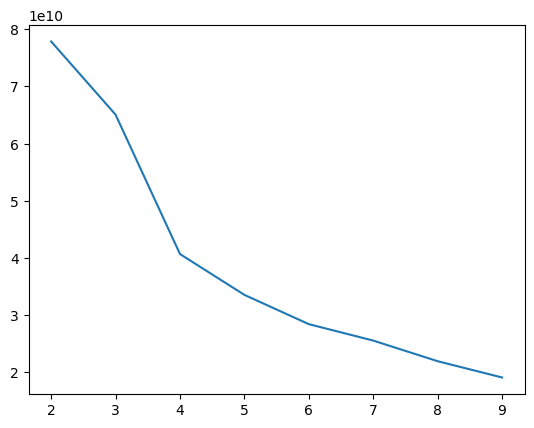

In [19]:
plt.plot(range(2,10),wcss); #dirsek methodunu buluyor


In [20]:
import seaborn as sns

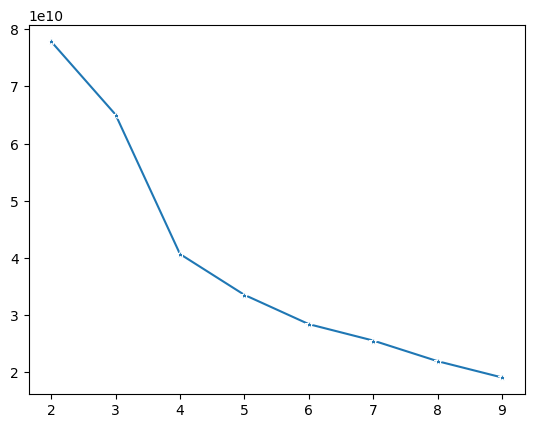

In [21]:
sns.lineplot(x=range(2,10),y=wcss,marker='*'); #dirsek methodunu buluyor

In [22]:
#pip install yellowbrick

In [23]:
from yellowbrick.cluster import KElbowVisualizer

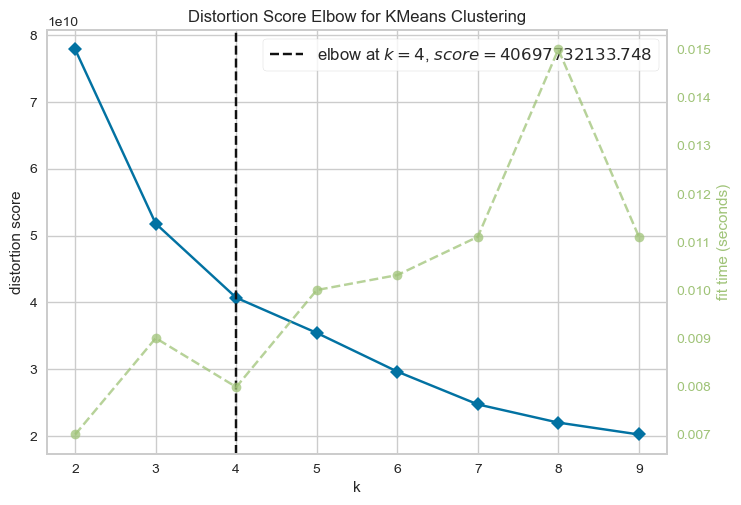

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [24]:
km = KMeans()
vis = KElbowVisualizer(km, k=(2,10))     #daha net dirsek methodu belli oluyor

vis.fit(x)
vis.show()


### hiyerarşik kumeleme 

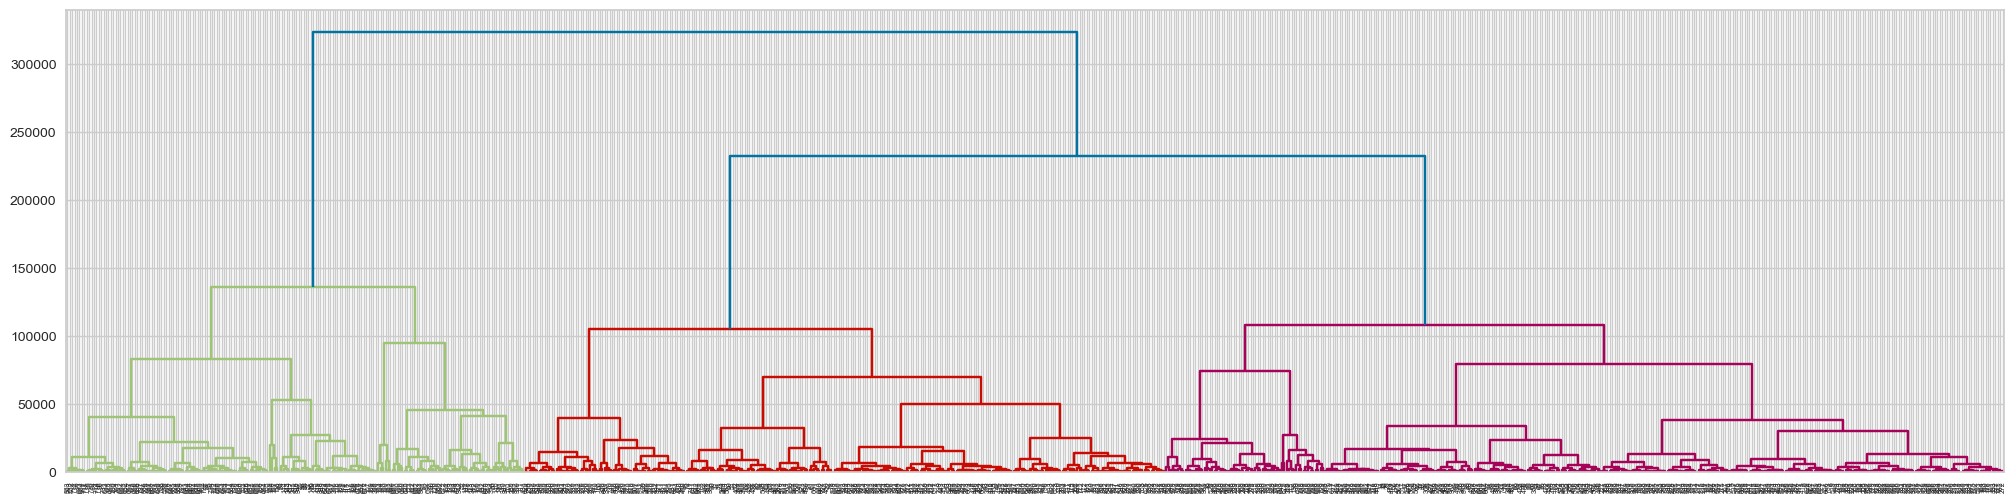

In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

data = linkage(x, method='ward', metric='euclidean')

plt.figure(figsize=(25,6))
dendrogram(data);    #alt gruplara ayırta ayıra gidiyor hepsini 


In [30]:
df=pd.read_csv('Billionaires.csv')

In [32]:
df.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,"$2,715,518,274,227",65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,"$21,427,700,000,000",88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


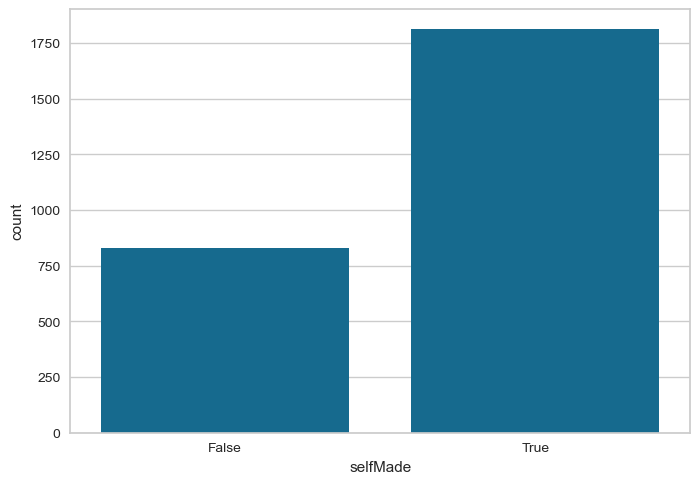

In [35]:
sns.countplot(x=df['selfMade']); #kedni kendine mi milyarder oldu yoksa aileden mi geldi 

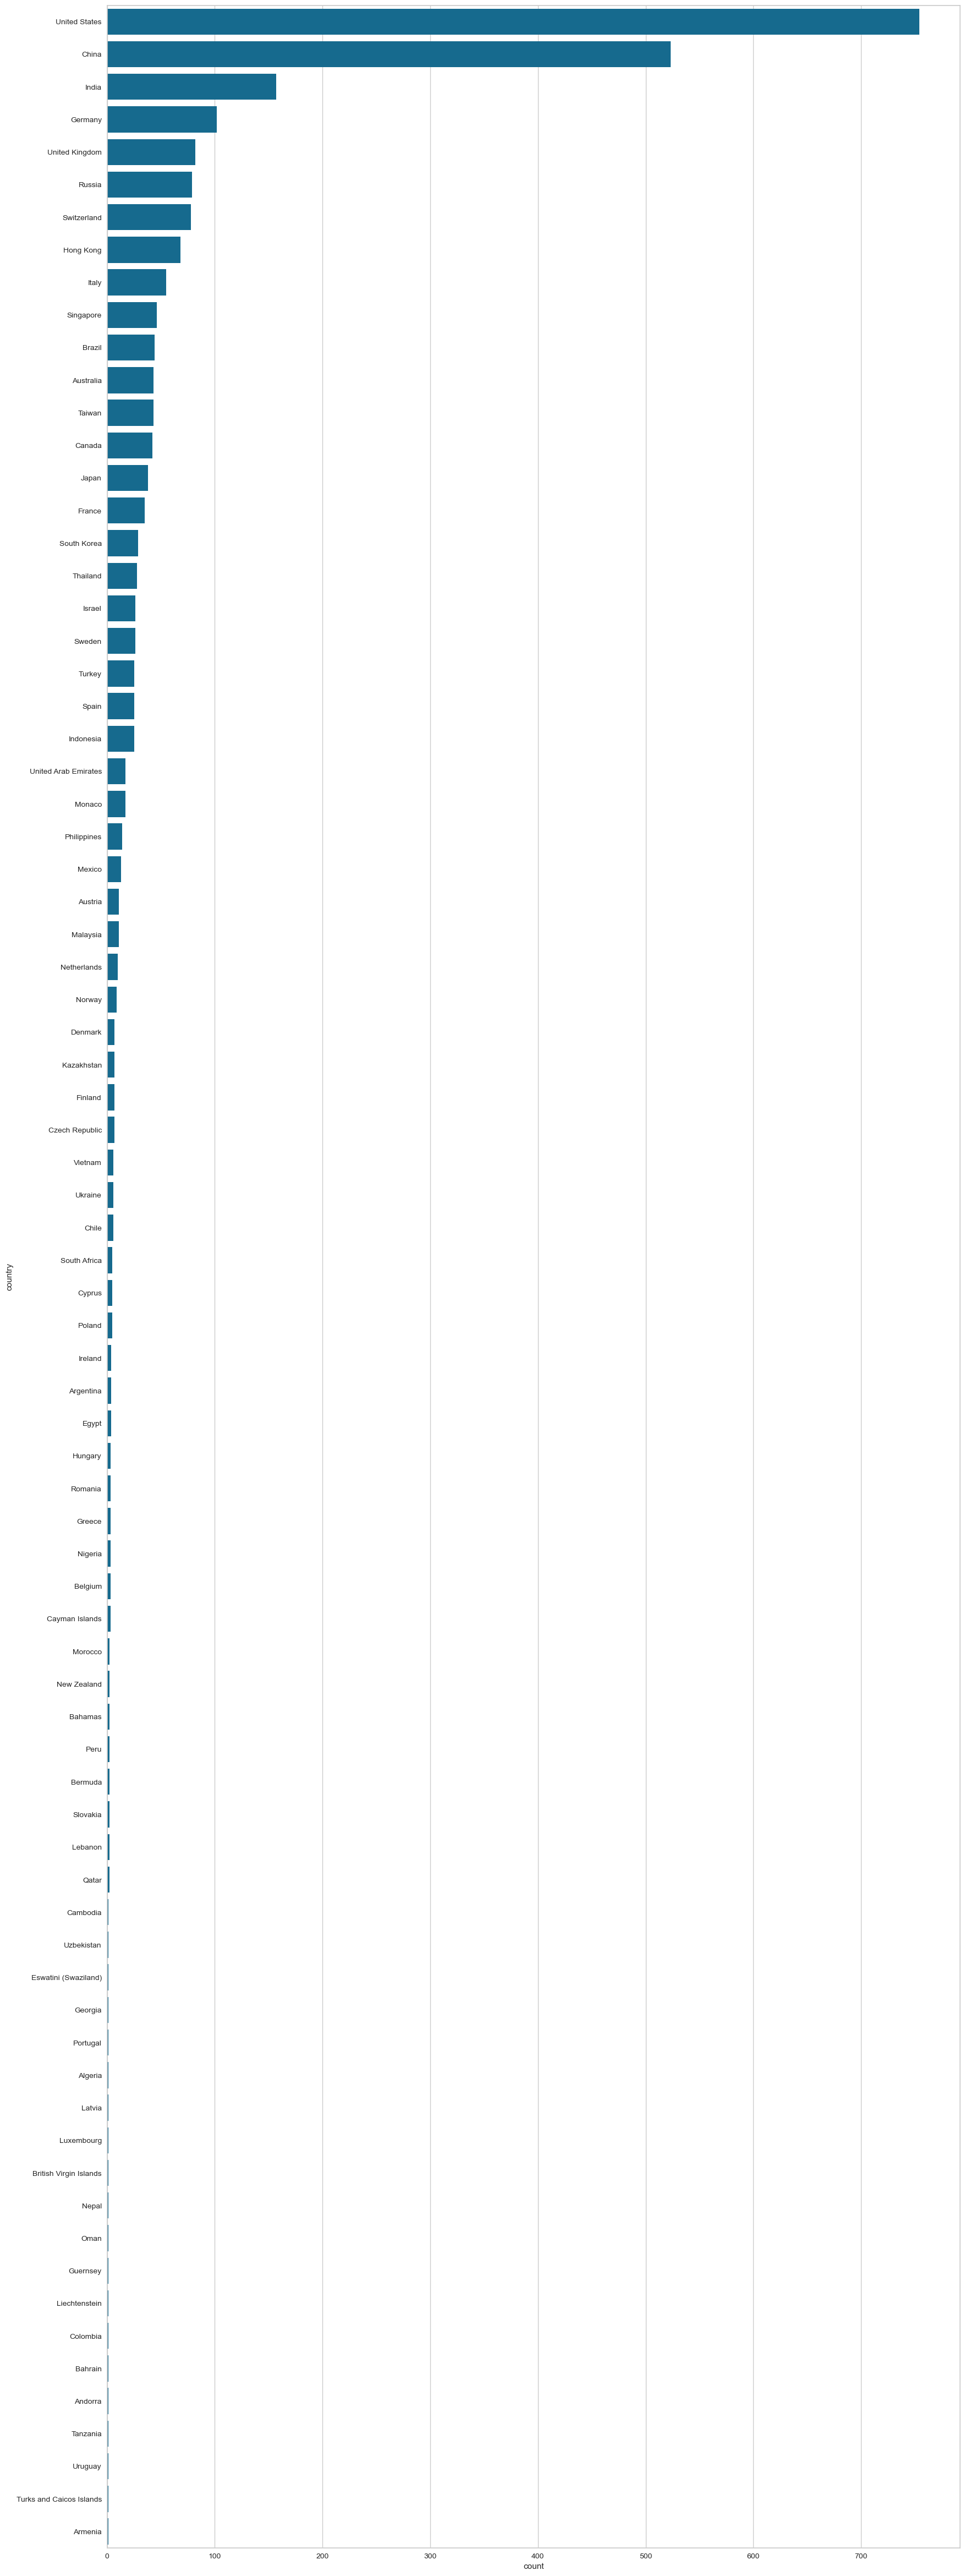

In [42]:
ydf=df['country'].value_counts().sort_values(ascending=False) #sıralama kodu
plt.figure(figsize=(20,60))
sns.countplot(y=df['country'], order=ydf.index); #çizdirme kodu 



In [44]:
tr=df[df['country']=='Turkey']

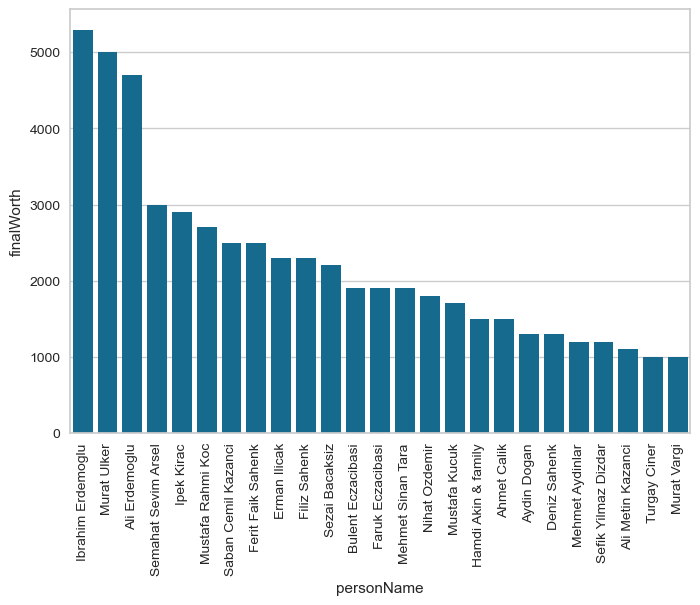

In [55]:
sns.barplot(x=tr['personName'],y=tr['finalWorth']);
plt.xticks(rotation=90);


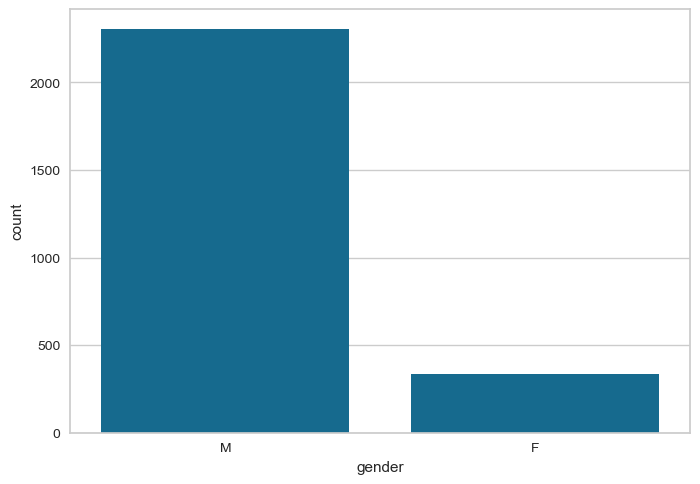

In [59]:
sns.countplot(x=df['gender']);

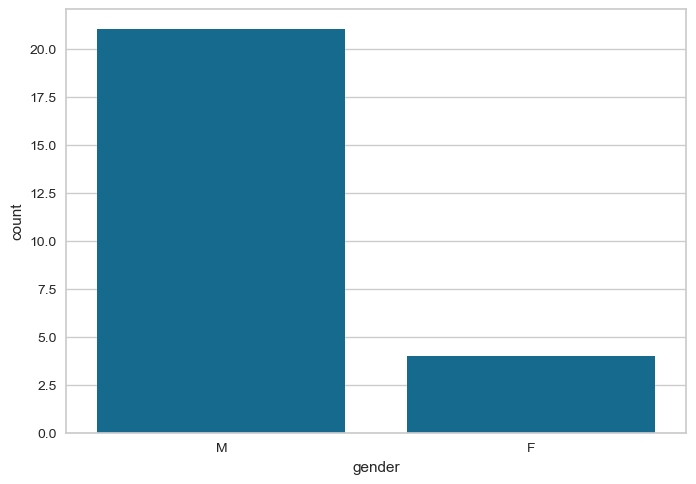

In [58]:
sns.countplot(x=tr['gender']);